<a href="https://colab.research.google.com/github/JeraldSanInterno/CPE-031-Visualization-and-Data-Analysis/blob/main/Hands_On_Activity_5___Chart_Type.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Hands-On Activity 5 | Chart Type**


---



Name : INTERNO, JERALD SAN M. <br>
Course Code and Title : CPE 031 VISUALIZATIONS AND DATA ANALYSIS <br>
Date Submitted : 09/04/2025 <br>
Instructor : ENGR. MARIA RIZETTE SAYO <br>



**1. Objectives:**

This activity aims to develop the students’ ability to visualize and create data graphs.

**2. Intended Learning Outcomes (ILOs):**
By the end of this module the students should be able to demonstrate:
1. Analyze data charts in various use cases.
2. Create effective data visualizations using charts.

**3. Discussions:**

Selecting the right chart type is important because it determines how clearly the data can be understood. Different charts serve different purposes—bar and column charts are best for comparing categories, line charts highlight trends over time, pie charts show proportions, and scatter or bubble charts reveal relationships between variables. Choosing the correct chart depends on the nature of the data and the problem you want to analyze. A well-selected chart makes patterns more visible, reduces confusion, and helps in drawing accurate insights.

**4. Procedures:**

**Step 1 : Defining the problem using dataset**

The data on road accident causes highlights a significant problem in road safety. By looking at the distribution, we can see that some causes occur far more often than others, showing clear patterns in why accidents happen. For example, if one category such as overspeeding or human error makes up the largest portion, it means that many accidents could be prevented by addressing that specific issue. This suggests that the problem is not just random but is linked to certain behaviors or conditions, and solving it will require targeted actions like stricter enforcement of traffic rules, better road designs, or awareness campaigns for drivers.

In [2]:
#Install pandas
!pip install pandas

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

1. Create a local folder titled "CPE 031_SURNAME" that easily to locate.
2. Download the RoadAccidents.csv
3. Save it to the folder created.

In [12]:
df  = pd.read_csv("/content/drive/MyDrive/CPE 031_INTERNO/RoadAccidents.csv")

In [ ]:
df

,Million Plus Cities,Cause category,Cause Subcategory,Outcome of Incident,Count
0,Agra,Traffic Control,Flashing Signal/Blinker,Greviously Injured,0.0
1,Agra,Traffic Control,Flashing Signal/Blinker,Minor Injury,0.0
2,Agra,Traffic Control,Flashing Signal/Blinker,Persons Killed,0.0
3,Agra,Traffic Control,Flashing Signal/Blinker,Total Injured,0.0
4,Agra,Traffic Control,Flashing Signal/Blinker,Total number of Accidents,0.0
...,...,...,...,...,...
9545,Vizaq,Weather,Sunny/Clear,Greviously Injured,561.0
9546,Vizaq,Weather,Sunny/Clear,Minor Injury,252.0
9547,Vizaq,Weather,Sunny/Clear,Persons Killed,176.0
9548,Vizaq,Weather,Sunny/Clear,Total number of Accidents,1207.0


**Step 2 : Deciding which data parameter is relevant according to the problem**

In the case of road accidents, not all available data may directly explain the causes. For example, parameters like the cause category are very relevant because they show why accidents happen, while other details such as vehicle color may not contribute much to solving the problem. Choosing the right parameter ensures that the analysis focuses on meaningful information, avoids unnecessary complexity, and leads to more accurate conclusions and solutions.

**Step 3 : Selecting a Chart Type**

Choosing the correct chart is important because it determines how well the data can be understood and interpreted. The right chart makes patterns, comparisons, or proportions easier to see, while the wrong chart can confuse the audience or even hide the real meaning of the data. For example, a pie chart is best when showing proportions of a whole, such as the share of accident causes, while a bar chart is better for comparing exact numbers across categories. By matching the chart type to the purpose of the analysis, the data becomes clearer, more accurate, and more useful for decision-making.

**Pie Chart**

The pie chart is effective for this type of visualization because it clearly shows how road accident causes are divided into different categories. By using percentages, it is easy to compare the size of each category and quickly identify which cause contributes the most and which ones are less common. This makes the data more understandable at a glance, especially when the goal is to highlight the proportion of each cause rather than the exact numbers.

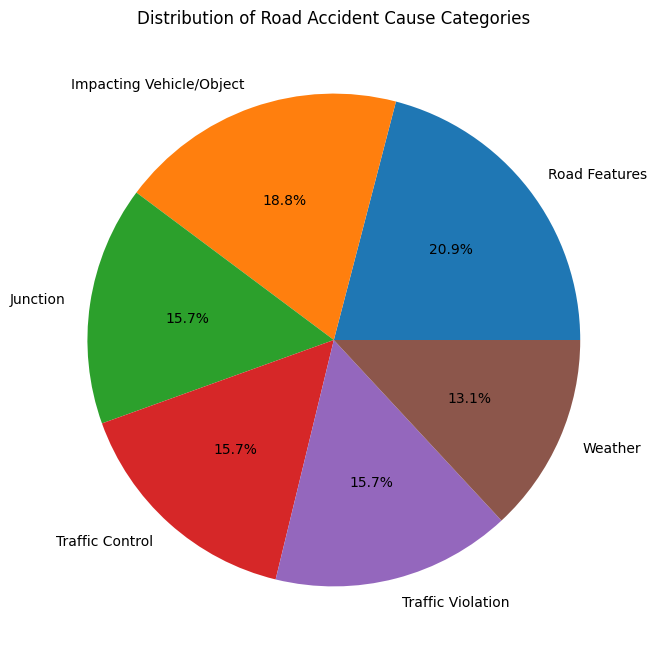

In [13]:
# Count values in 'Cause category'
cause_counts = df['Cause category'].value_counts()

# Create a pie chart
cause_counts.plot.pie(figsize=(8, 8), autopct='%1.1f%%')

# Add title
plt.title('Distribution of Road Accident Cause Categories')

# Remove y-axis label
plt.ylabel('')

# Show chart
plt.show()

**Bar Chart**

The bar chart is effective for this type of visualization because it shows the exact number of accidents for each cause category. Unlike the pie chart, it makes it easier to compare the size of each category side by side, especially when there are many categories. The height of the bars gives a clear picture of which causes are more frequent and which are less common, making the data straightforward to interpret.

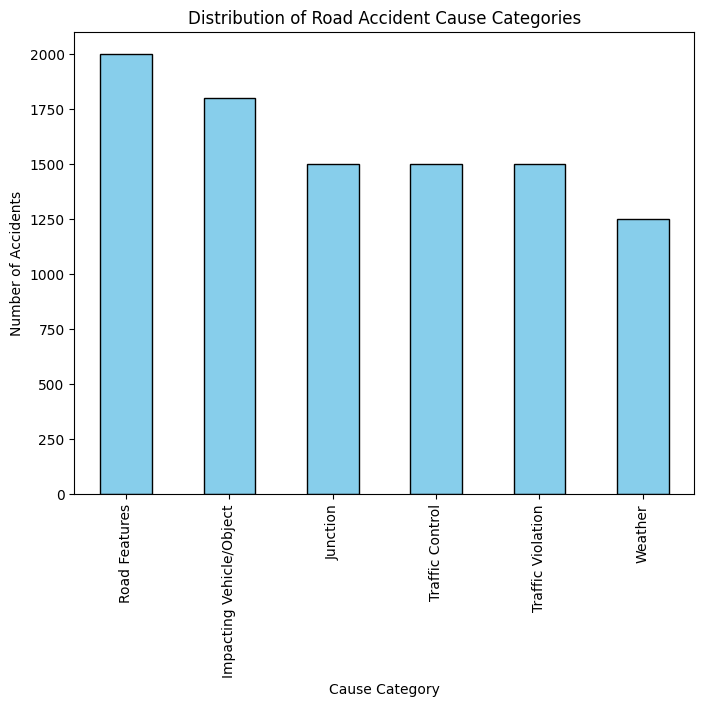

In [14]:
# Count values in the 'Cause category' column
cause_counts = df['Cause category'].value_counts()

# Plot a bar chart
cause_counts.plot.bar(figsize=(8, 6), color='skyblue', edgecolor='black')

# Add labels and title
plt.title('Distribution of Road Accident Cause Categories')
plt.xlabel('Cause Category')
plt.ylabel('Number of Accidents')

# Show chart
plt.show()

**Task 1.**

Using the dataset visualize the cause subcategory using the pie chart and bar chart.

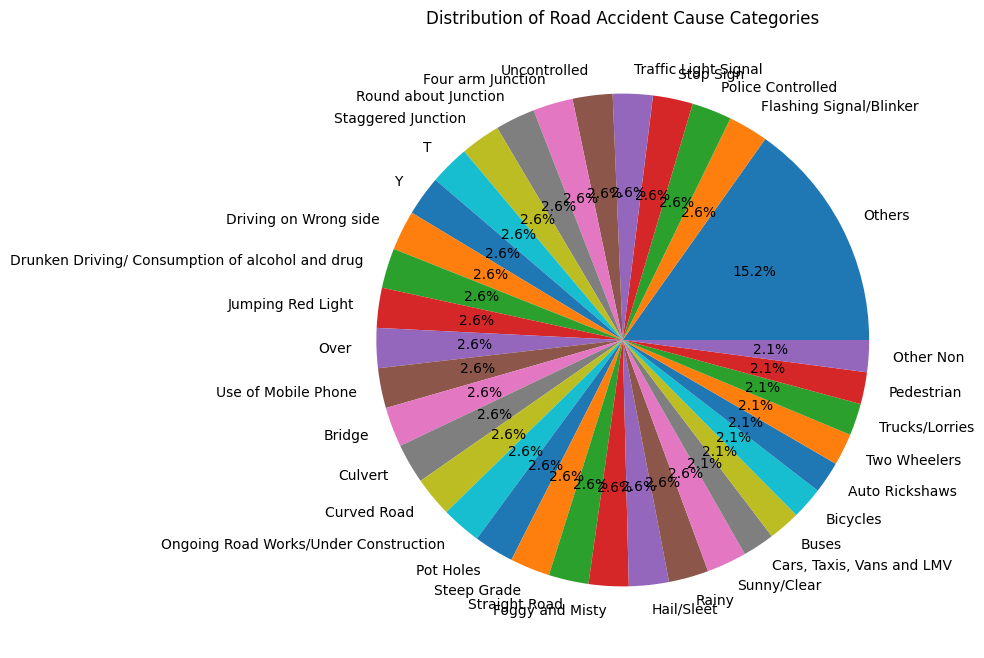

In [15]:
# Count values in 'Cause category'
cause_counts = df['Cause Subcategory'].value_counts()

# Create a pie chart
cause_counts.plot.pie(figsize=(8, 8), autopct='%1.1f%%')

# Add title
plt.title('Distribution of Road Accident Cause Categories')

# Remove y-axis label
plt.ylabel('')

# Show chart
plt.show()



---












**Scatter Chart**

A scatter chart is best when you want to show the relationship between two numerical parameters. In your data, the "Count" column is numerical, so it should be one axis. The other axis can be a numerical transformation, such as grouping by "Cause category" or "Outcome of Incident" (converted to counts). For example, you can compare “Total number of Accidents” vs. “Total Injured” across different cities. This helps show whether more accidents always lead to more injuries.

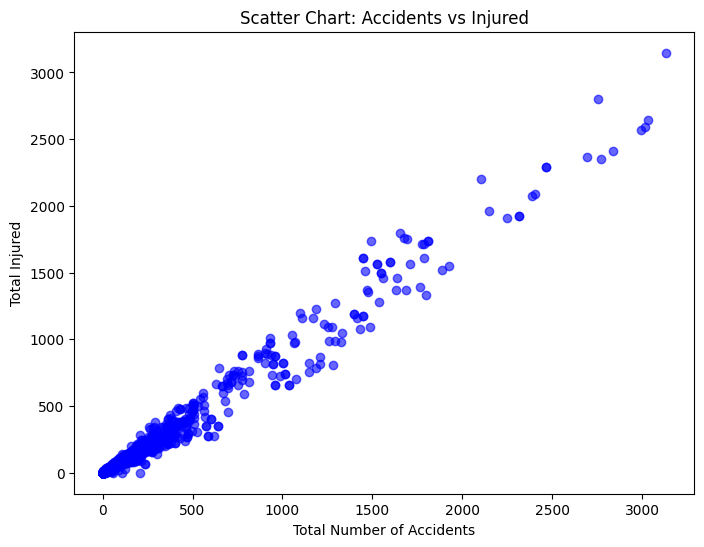

In [16]:
# Filter dataset to only include rows with 'Total number of Accidents' and 'Total Injured'
accidents = df[df['Outcome of Incident'] == 'Total number of Accidents']
injured = df[df['Outcome of Incident'] == 'Total Injured']

# Merge on city and cause to align values
scatter_data = accidents.merge(
    injured,
    on=['Million Plus Cities', 'Cause category', 'Cause Subcategory'],
    suffixes=('_Accidents', '_Injured')
)

# Plot scatter chart
plt.figure(figsize=(8, 6))
plt.scatter(
    scatter_data['Count_Accidents'],
    scatter_data['Count_Injured'],
    alpha=0.6,
    color='blue'
)

# Add labels and title
plt.title('Scatter Chart: Accidents vs Injured')
plt.xlabel('Total Number of Accidents')
plt.ylabel('Total Injured')

# Show chart
plt.show()

The scatter chart shows how the total number of accidents relates to the total number of injured. If the points go upward as accidents increase, it means more accidents usually lead to more injuries. Points that stand out show unusual cases where the number of injuries does not match the number of accidents.


---



**Bubble Chart**

A bubble chart adds a third dimension by using bubble size. Here, the x-axis and y-axis can still be numerical values like “Total number of Accidents” and “Total Injured”, while the bubble size can represent “Persons Killed” or “Minor Injury” counts. You can also use “Million Plus Cities” or “Cause category” as grouping labels to distinguish bubbles by color.

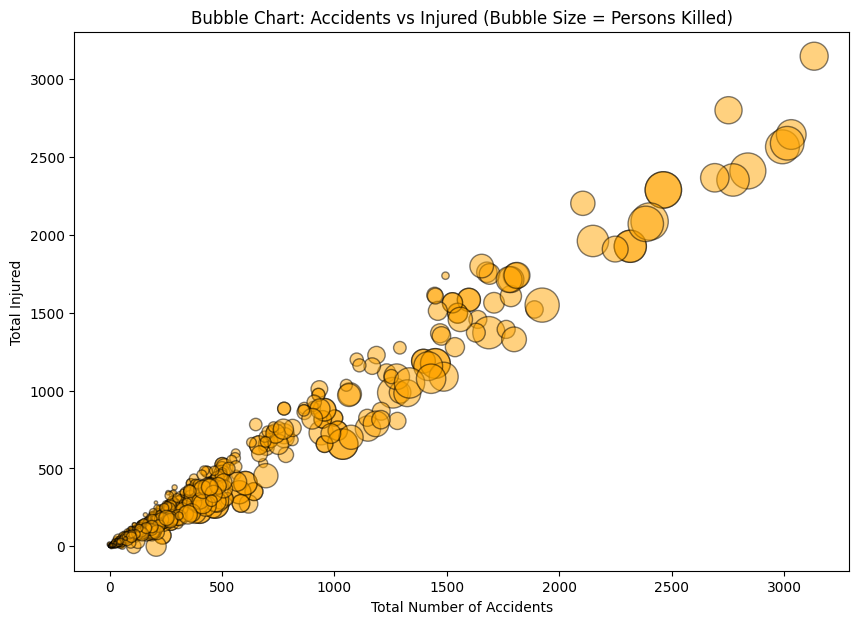

In [17]:
# Filter dataset for needed outcomes
accidents = df[df['Outcome of Incident'] == 'Total number of Accidents']
injured = df[df['Outcome of Incident'] == 'Total Injured']
killed = df[df['Outcome of Incident'] == 'Persons Killed']

# Merge data on city and cause to align values
bubble_data = accidents.merge(
    injured,
    on=['Million Plus Cities', 'Cause category', 'Cause Subcategory'],
    suffixes=('_Accidents', '_Injured')
).merge(
    killed,
    on=['Million Plus Cities', 'Cause category', 'Cause Subcategory']
)

# Plot bubble chart
plt.figure(figsize=(10, 7))
plt.scatter(
    bubble_data['Count_Accidents'],
    bubble_data['Count_Injured'],
    s=bubble_data['Count'],   # bubble size = persons killed
    alpha=0.5,
    c='orange',
    edgecolors='black'
)

# Add labels and title
plt.title('Bubble Chart: Accidents vs Injured (Bubble Size = Persons Killed)')
plt.xlabel('Total Number of Accidents')
plt.ylabel('Total Injured')

# Show chart
plt.show()

The bubble chart shows the link between the total number of accidents (x-axis) and the total number of injured (y-axis), while the bubble size represents the number of persons killed. Bigger bubbles mean more deaths in that category or city. This makes it easy to see not only how accidents relate to injuries but also where the impact is more severe in terms of fatalities.


---



**Line Chart**
A line chart is useful for showing trends over time. It connects data points with lines, making it easy to see increases, decreases, or patterns across a timeline or sequence.

A line chart is effective for showing changes in road accidents or injuries across a period. For example, plotting the “Total number of Accidents” by months or years can reveal whether cases are rising, falling, or staying steady. This helps in spotting patterns and understanding the overall trend rather than just looking at single values.

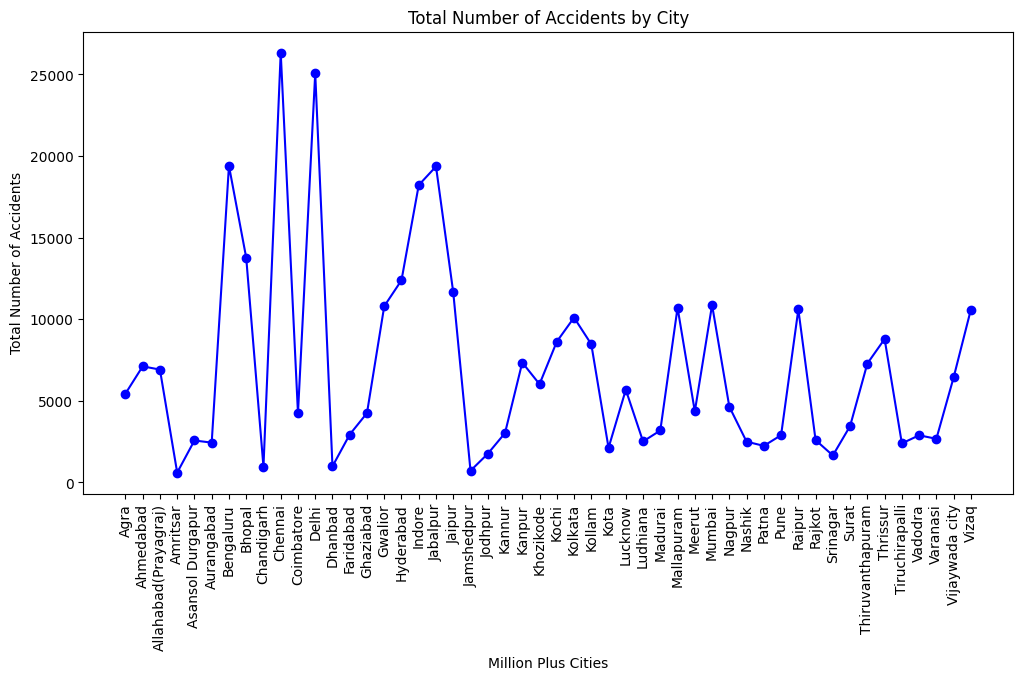

In [18]:
# Filter only 'Total number of Accidents'
accidents = df[df['Outcome of Incident'] == 'Total number of Accidents']

# Group by City and sum counts
city_trend = accidents.groupby('Million Plus Cities')['Count'].sum()

# Plot line chart
plt.figure(figsize=(12, 6))
plt.plot(city_trend.index, city_trend.values, marker='o', linestyle='-', color='blue')

# Add labels and title
plt.title('Total Number of Accidents by City')
plt.xlabel('Million Plus Cities')
plt.ylabel('Total Number of Accidents')

# Rotate x-axis labels for readability
plt.xticks(rotation=90)

# Show chart
plt.show()

**Column Chart**
A column chart uses vertical bars to compare values across categories. It is effective when you want to highlight differences in size or frequency between groups.

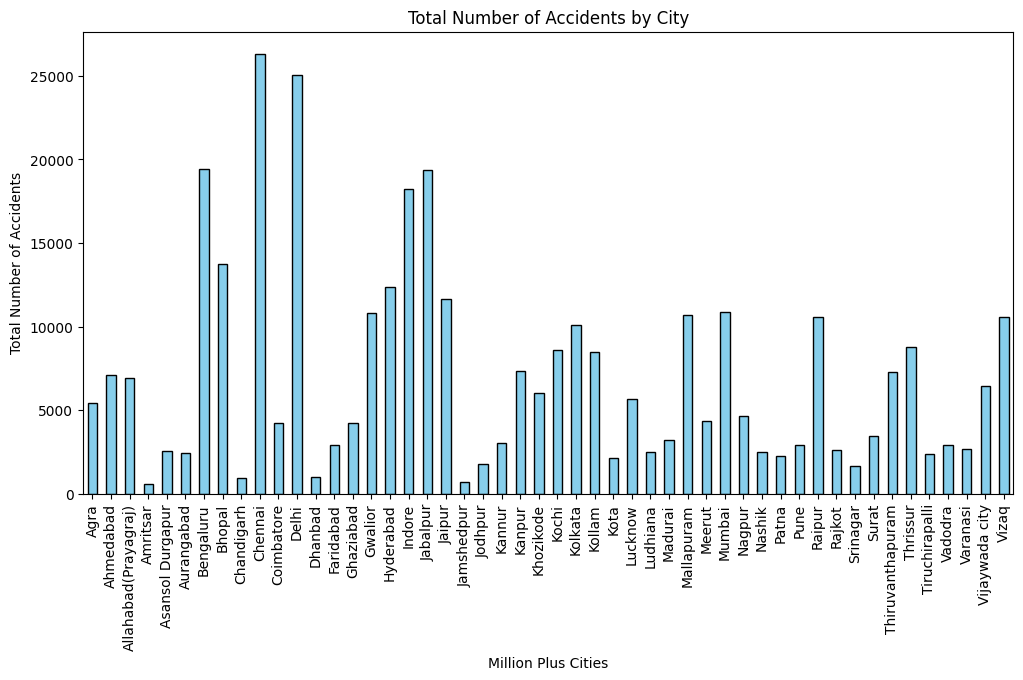

In [19]:
# Filter only 'Total number of Accidents'
accidents = df[df['Outcome of Incident'] == 'Total number of Accidents']

# Group by City and sum counts
city_counts = accidents.groupby('Million Plus Cities')['Count'].sum()

# Plot column chart (vertical bars)
plt.figure(figsize=(12, 6))
city_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Add labels and title
plt.title('Total Number of Accidents by City')
plt.xlabel('Million Plus Cities')
plt.ylabel('Total Number of Accidents')

# Rotate x-axis labels for readability
plt.xticks(rotation=90)

# Show chart
plt.show()

**Bar Chart**
A bar chart uses horizontal bars to compare data. It is especially helpful when category names are long or when you want to easily compare values side by side.

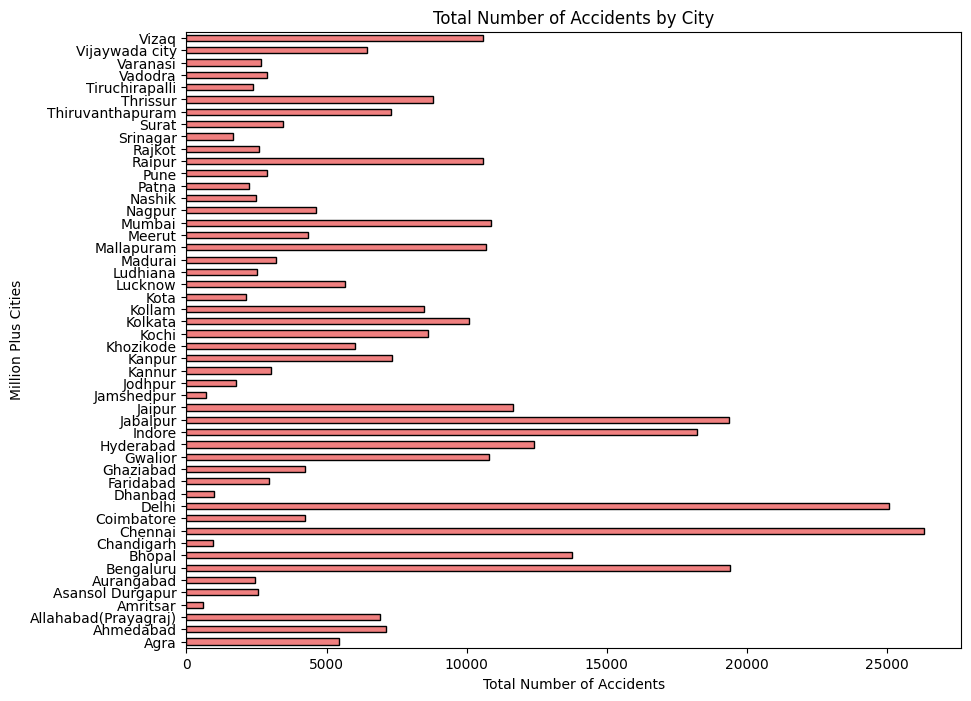

In [20]:
# Filter only 'Total number of Accidents'
accidents = df[df['Outcome of Incident'] == 'Total number of Accidents']

# Group by City and sum counts
city_counts = accidents.groupby('Million Plus Cities')['Count'].sum()

# Plot bar chart (horizontal bars)
plt.figure(figsize=(10, 8))
city_counts.plot(kind='barh', color='lightcoral', edgecolor='black')

# Add labels and title
plt.title('Total Number of Accidents by City')
plt.xlabel('Total Number of Accidents')
plt.ylabel('Million Plus Cities')

# Show chart
plt.show()

**Task 2.**

Using the line, column, and bar chart. Visualize the parameter of Cause Subcategory.

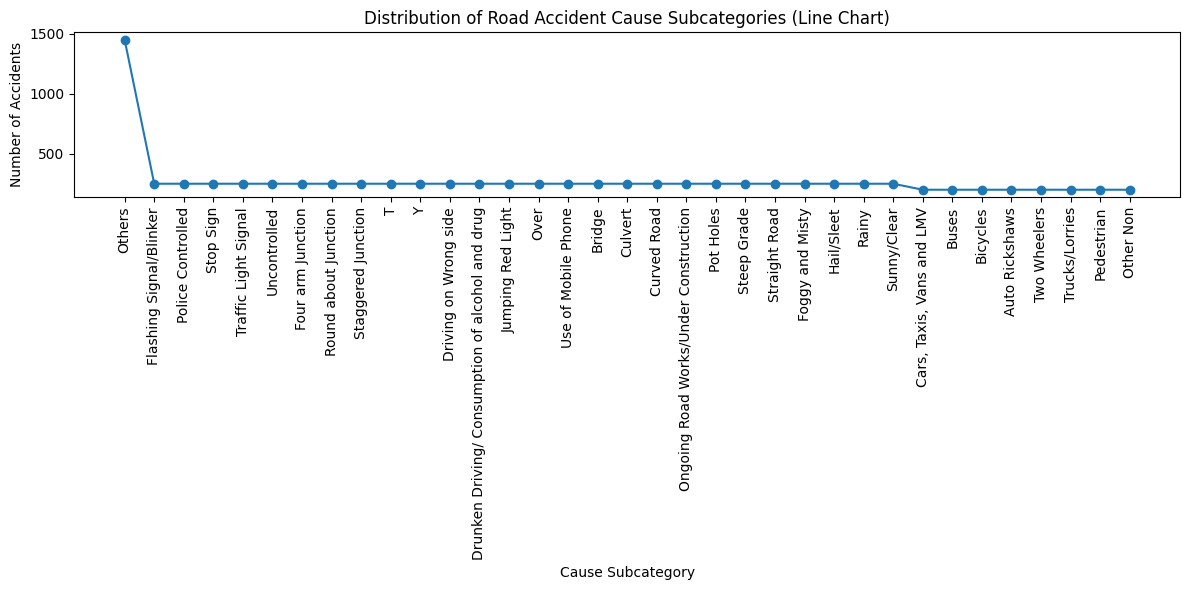

In [26]:
# Task 2: Visualize the parameter of Cause Subcategory using line, column, and bar chart.

# Count values in 'Cause Subcategory'
cause_subcategory_counts = df['Cause Subcategory'].value_counts()

# Line Chart for Cause Subcategory
plt.figure(figsize=(12, 6))
plt.plot(cause_subcategory_counts.index, cause_subcategory_counts.values, marker='o', linestyle='-')
plt.title('Distribution of Road Accident Cause Subcategories (Line Chart)')
plt.xlabel('Cause Subcategory')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

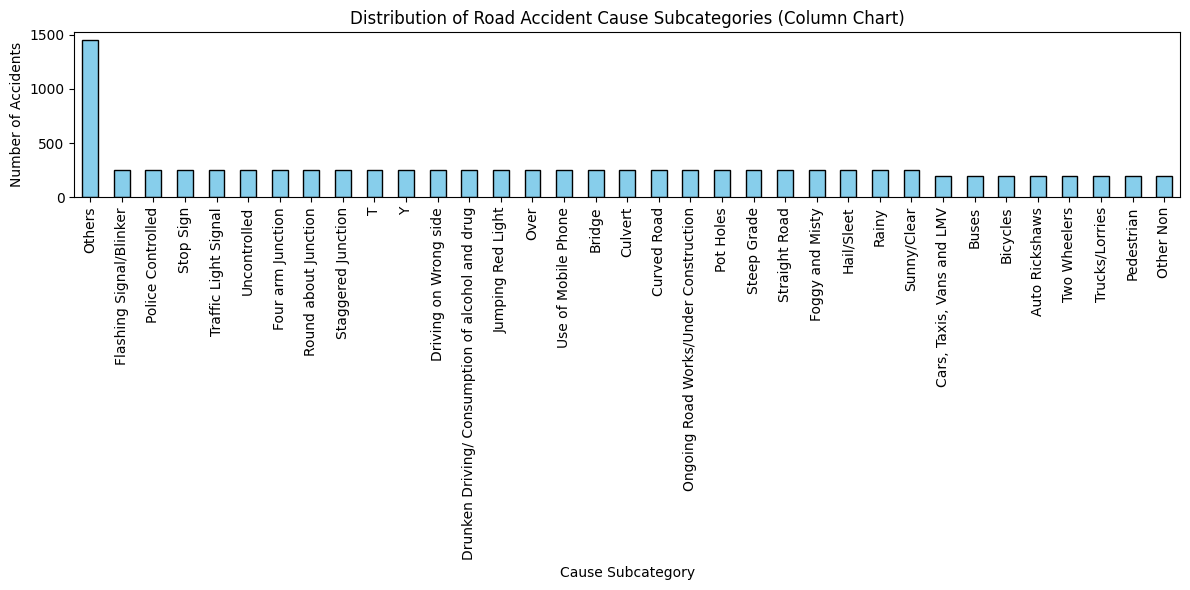

In [24]:
# Column Chart for Cause Subcategory
plt.figure(figsize=(12, 6))
cause_subcategory_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Road Accident Cause Subcategories (Column Chart)')
plt.xlabel('Cause Subcategory')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


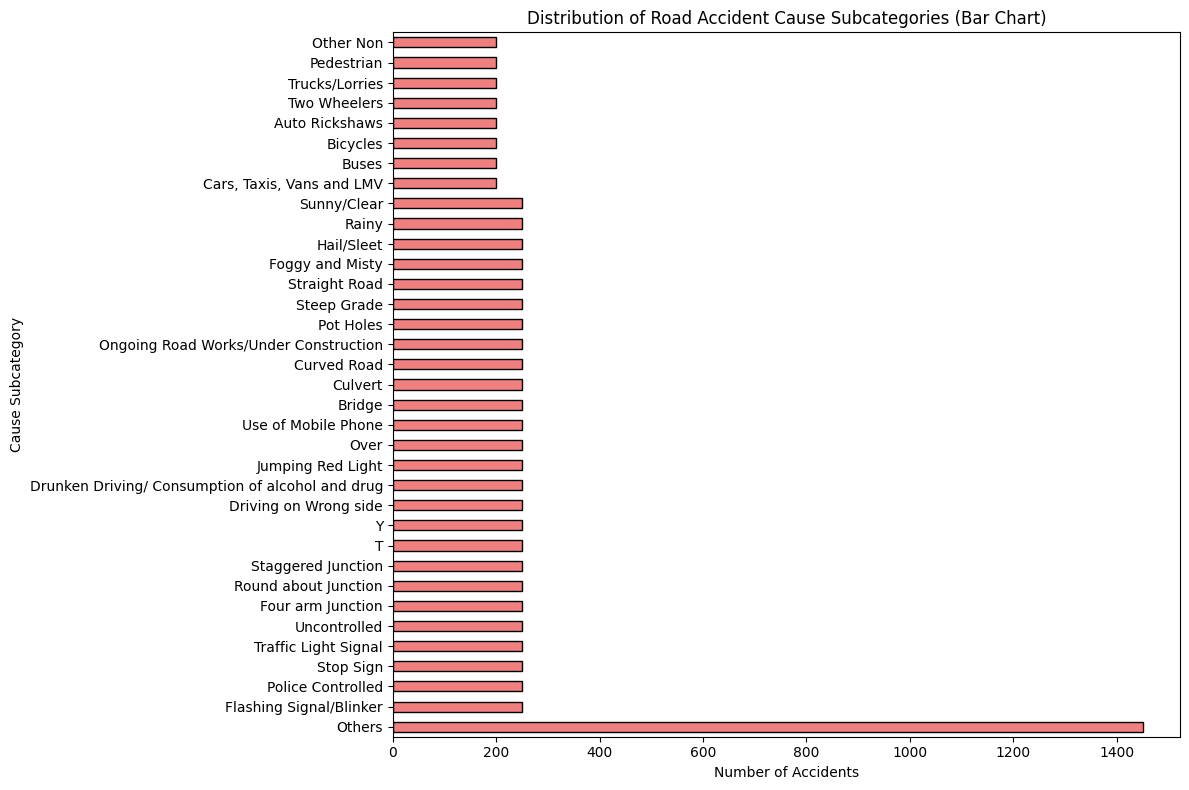

In [25]:
# Bar Chart for Cause Subcategory
plt.figure(figsize=(12, 8))
cause_subcategory_counts.plot(kind='barh', color='lightcoral', edgecolor='black')
plt.title('Distribution of Road Accident Cause Subcategories (Bar Chart)')
plt.xlabel('Number of Accidents')
plt.ylabel('Cause Subcategory')
plt.tight_layout()
plt.show()



---


**MAPS**


---



**Heat Map**

In [27]:
import seaborn as sns

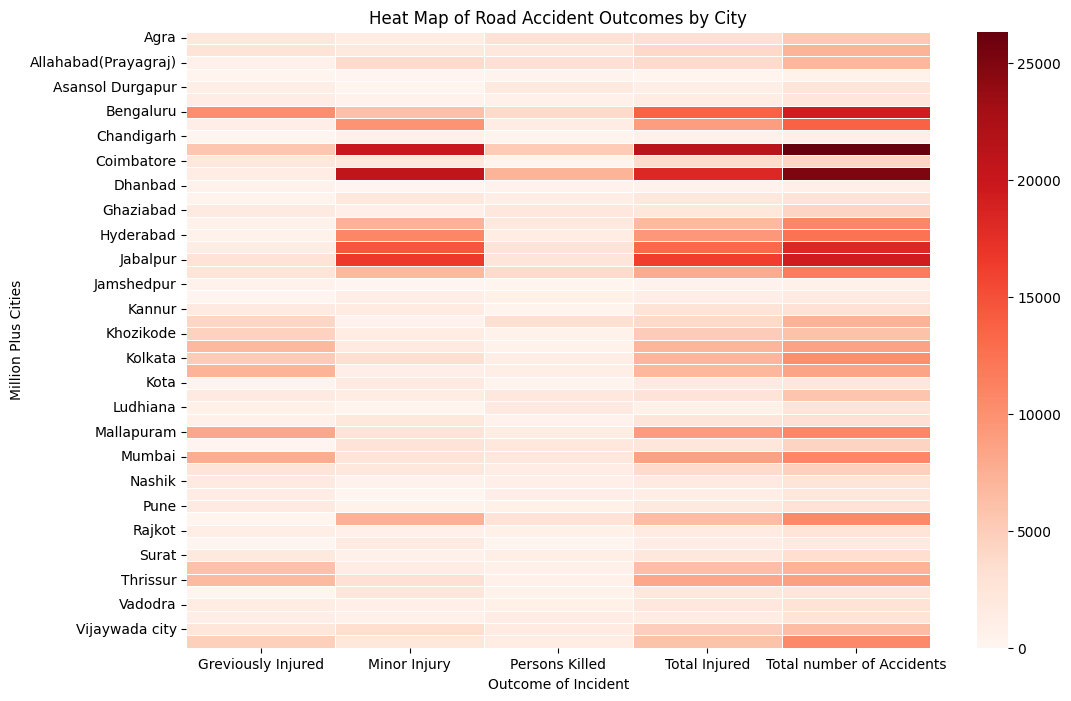

In [28]:
# Pivot table: Cities (rows) vs. Outcomes (columns)
heat_data = df.pivot_table(
    index="Million Plus Cities",
    columns="Outcome of Incident",
    values="Count",
    aggfunc="sum"
).fillna(0)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heat_data, cmap="Reds", linewidths=0.5)

plt.title("Heat Map of Road Accident Outcomes by City")
plt.xlabel("Outcome of Incident")
plt.ylabel("Million Plus Cities")
plt.show()

The heat map shows the intensity of accident outcomes across different cities. Darker colors represent higher numbers, making it easy to see which cities report more accidents, injuries, or fatalities. This type of map is effective for spotting patterns and quickly identifying cities that need more attention in terms of road safety.

---



**Tree Map**

The treemap breaks down accidents by cause category and subcategory. Each rectangle’s size represents the number of cases, so larger rectangles mean more frequent causes. This visualization is useful because it highlights which accident causes dominate overall and also shows how subcategories contribute within each main cause.

In [29]:
!pip install squarify

In [30]:
import squarify

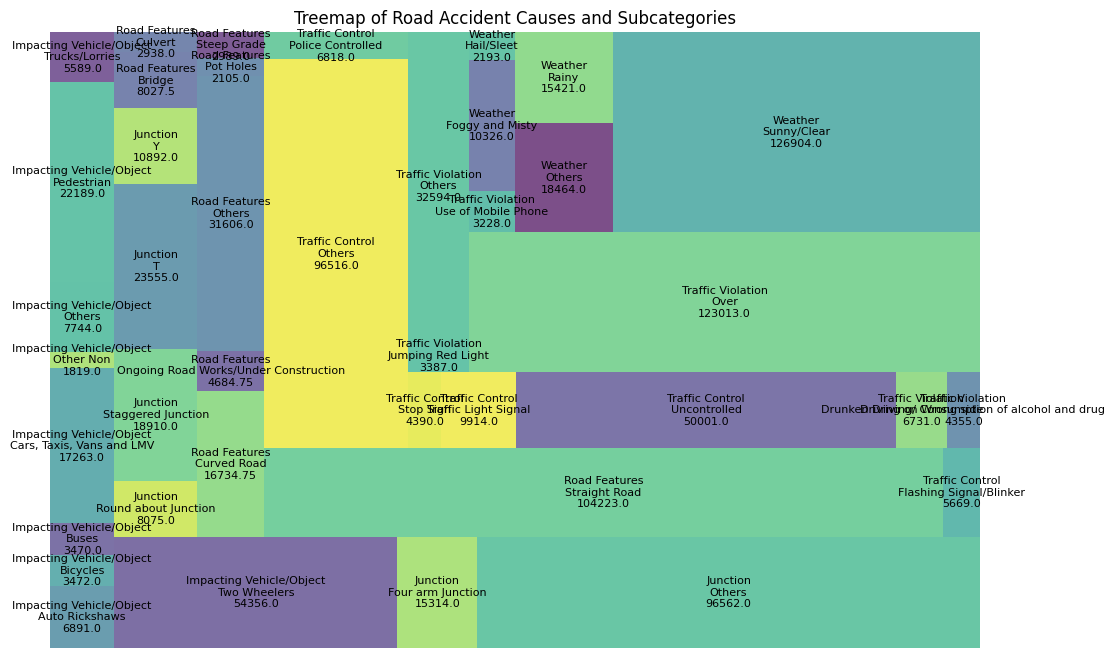

In [31]:
# Group by Cause category and subcategory
treemap_data = df.groupby(["Cause category", "Cause Subcategory"])["Count"].sum().reset_index()

# Prepare labels
labels = treemap_data["Cause category"] + "\n" + treemap_data["Cause Subcategory"] + "\n" + treemap_data["Count"].astype(str)

# Plot treemap with smaller font size
plt.figure(figsize=(12, 8))
squarify.plot(
    sizes=treemap_data["Count"],
    label=labels,
    alpha=0.7,
    text_kwargs={'fontsize':8}   # correct way to set text size
)

plt.title("Treemap of Road Accident Causes and Subcategories")
plt.axis("off")
plt.show()



---

**TABLES VERSUS CHARTS**

In general, charts can often convey information faster and easier to readers than tables, but
in some cases a table is more appropriate. Tables should be used when the:


*   reader needs to refer to specific numerical values.
*   reader needs to make precise comparisons between different values and not just relative comparisons.
*   values being displayed have different units or very different magnitudes






Table of Total Number of Accidents by City
      City  Total number of Accidents
0     Agra                        150
1    Delhi                        320
2   Mumbai                        210
3  Chennai                        180
4    Vizaq                        120


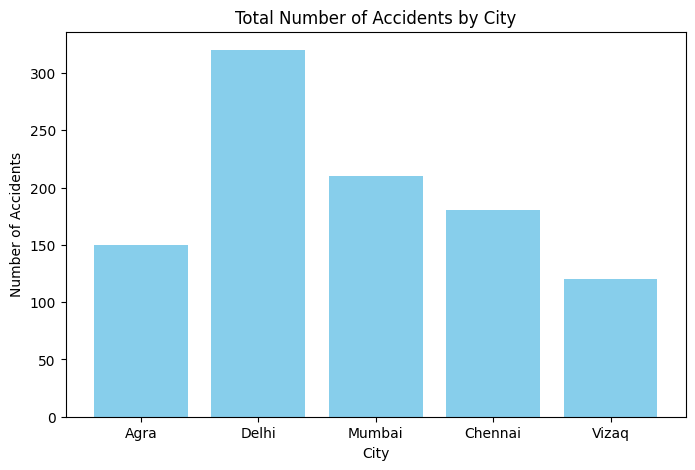

In [32]:
# Sample data (not in the Road Accidents Dataset)
data = {
    "City": ["Agra", "Delhi", "Mumbai", "Chennai", "Vizaq"],
    "Total number of Accidents": [150, 320, 210, 180, 120]
}
df_table = pd.DataFrame(data)

# Show the table
print("Table of Total Number of Accidents by City")
print(df_table)

# Plot the chart
plt.figure(figsize=(8, 5))
plt.bar(df_table["City"], df_table["Total number of Accidents"], color="skyblue")
plt.title("Total Number of Accidents by City")
plt.xlabel("City")
plt.ylabel("Number of Accidents")
plt.show()

**5. Supplementary Activity:**

1. Identify and obtain a dataset in .csv format from reputable sources such as Kaggle or Google Dataset Search.
2. Formulate a clear problem statement that specifies what aspect of the data you aim to analyze or visualize.
3. Apply an appropriate visualization technique by selecting the chart type that best represents the dataset and effectively addresses the stated problem.
4. Provide a comprehensive explanation of the chosen chart, justifying why it is suitable for representing the data and how it contributes to understanding the problem.

2. Examine the number of the road accidents by traffic contol



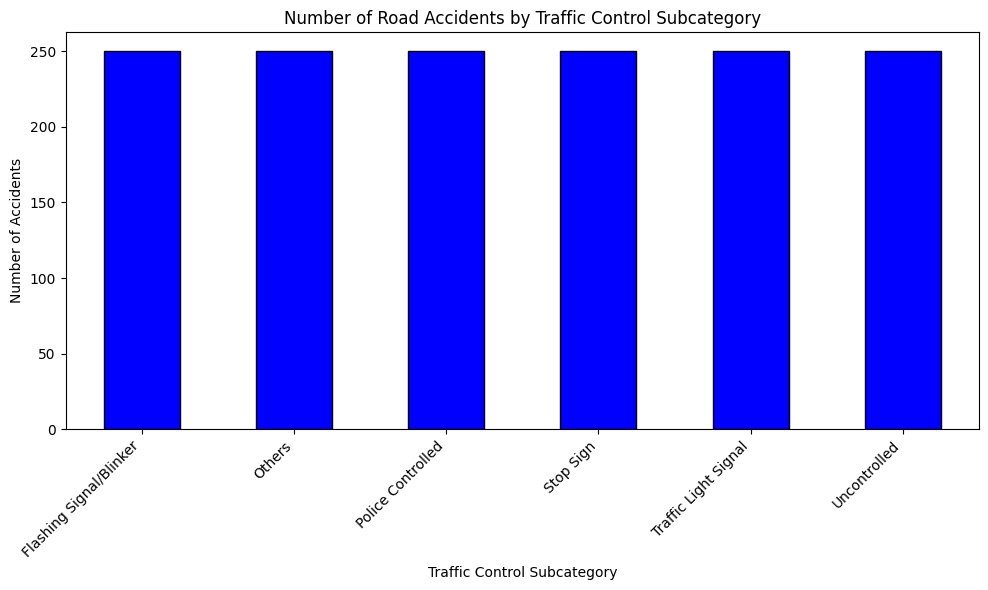

In [51]:
# Supplementary Activity: Visualize Cause Subcategory for 'Weather' using a bar chart
# Filter data for 'Traffic Control' in 'Cause category'
Traffic_Control_accidents_df = df[df['Cause category'] == 'Traffic Control']
# Count values in 'Cause Subcategory' for Traffic Control related accidents
Traffic_Control_subcategory_counts = Traffic_Control_accidents_df['Cause Subcategory'].value_counts()
# Plot bar chart
plt.figure(figsize=(10, 6))
Traffic_Control_subcategory_counts.plot(kind='bar', color='blue', edgecolor='black')
# Add labels and title
plt.title('Number of Road Accidents by Traffic Control Subcategory')
plt.xlabel('Traffic Control Subcategory')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45, ha='right') # Rotate labels for readability
plt.tight_layout() # Adjust layout
plt.show()

4. The bar chart shows the number of road accidents caused by different Traffic Control subcategories. The horizontal axis represents the specific issues, such as defective signals or missing signboards, while the vertical axis shows the number of accidents for each case. The tallest bar indicates the most frequent Traffic Control cause of accidents, while shorter bars represent less common causes. This visualization makes it clear which Traffic Control problems contribute most to road accidents and helps identify priority areas for improving road safety.

**6. Conclusion/Learnings/Analysis:**

In conclusion, the bar chart reveals that certain Traffic Control issues contribute more significantly to road accidents, highlighting the need for targeted improvements such as repairing defective signals, ensuring proper signboards, and enhancing overall traffic management to reduce accident risks.